In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
import nltk
import re
from nltk.corpus import stopwords
import string

In [87]:
data=pd.read_csv("consumercomplaints.csv")
data

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN
...,...,...,...,...,...,...,...
3101964,3101964,2017-02-09,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt resulted from identity theft,I have disputed my debts several times with no...
3101965,3101965,2015-04-29,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,My father died in XX/XX/XXXX. Left me his only...
3101966,3101966,2017-03-31,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,cfbp i would Like to file a complaint on Exper...
3101967,3101967,2017-01-16,Credit reporting,NaN,Incorrect information on credit report,Account status,My husband and I are in the middle of an FHA S...


In [106]:
data1=data[:10000]
data1

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN
...,...,...,...,...,...,...,...
9995,9995,2022-11-05,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN
9996,9996,2022-11-05,Vehicle loan or lease,Lease,Getting a loan or lease,Changes in terms mid-deal or after closing,NaN
9997,9997,2022-11-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN
9998,9998,2022-11-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN


In [107]:
data1 = data1.drop("Unnamed: 0",axis=1)
data1

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative
0,2022-11-11,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,NaN
1,2022-11-23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN
2,2022-11-16,Mortgage,VA mortgage,Trouble during payment process,NaN,NaN
3,2022-11-15,Checking or savings account,Checking account,Managing an account,Fee problem,"Hi, I have been banking with Wells Fargo for o..."
4,2022-11-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN
...,...,...,...,...,...,...
9995,2022-11-05,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,NaN
9996,2022-11-05,Vehicle loan or lease,Lease,Getting a loan or lease,Changes in terms mid-deal or after closing,NaN
9997,2022-11-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,NaN
9998,2022-11-08,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN


In [108]:
print(data1.isnull().sum())

Date received                      0
Product                            0
Sub-product                        0
Issue                              0
Sub-issue                        407
Consumer complaint narrative    9470
dtype: int64


In [109]:

count=data1["Product"].value_counts()
print(count)

Credit reporting, credit repair services, or other personal consumer reports    8382
Debt collection                                                                  438
Credit card or prepaid card                                                      351
Checking or savings account                                                      327
Mortgage                                                                         180
Money transfer, virtual currency, or money service                               114
Vehicle loan or lease                                                             88
Student loan                                                                      66
Payday loan, title loan, or personal loan                                         54
Name: Product, dtype: int64


<AxesSubplot:>

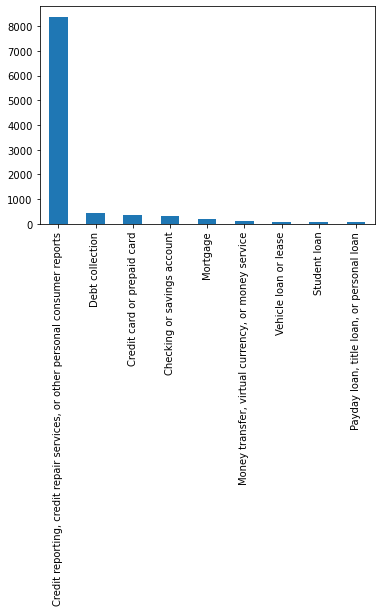

In [97]:
data1['Product'].value_counts().plot(kind='bar')

In [99]:
data1[['Product']].notnull().all()

Product    True
dtype: bool

In [117]:
data1 = data1.dropna()

CLASSIFICATION MODEL

In [118]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data1["Consumer complaint narrative"] = data1["Consumer complaint narrative"].apply(clean)


In [120]:
data1 = data1[["Consumer complaint narrative", "Product"]]
x = np.array(data1["Consumer complaint narrative"])
y = np.array(data1["Product"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [121]:
sgdmodel = SGDClassifier()
sgdmodel.fit(X_train,y_train)

SGDClassifier()

In [127]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = sgdmodel.predict(data)
print("\n")
print("The classified consumer complaint is under: ")
print(output)

Enter a Text: Investigation took more than 30 days and nothing was changed when clearly there are misleading, incorrect, inaccurate items on my credit report..i have those two accounts attached showing those inaccuracies... I need them to follow the law because this is a violation of my rights!! The EVIDENCE IS IN BLACK AND WHITE .


The classified consumer complaint is under: 
['Credit reporting, credit repair services, or other personal consumer reports']
